In [2]:
import pandas as pd
import ipywidgets as widgets
import importlib
import functions
% matplotlib inline
import IPython.display

## Important: Select your dataset ID in this menu before running the analysis below.

In [3]:
dataset_id = widgets.Dropdown(options=range(1, 7))
dataset_id

Dropdown(options=(1, 2, 3, 4, 5, 6), value=1)

# Diet

Next, you'll figure out what kind of food your animal has eaten.

We often do this using **digestive bacteria** - these are helpful bacteria which help our bodies digest food.

Different animals need different bacteria.

Animals which eat meat need to digest more **protein**

Animals which eat plants need to digest more **cellulose**

## Identify diet using digestive bacteria

In the Data Analysis step we looked for 44 common digestive bacteria in our samples - this will help us find out a lot about the animal's diet.

The matrix below shows which bacteria are present in some example animals.

1 = this animal has this bacterium

0 = this animal doesn't have this bacterium

In [4]:
matrix = pd.read_csv("../data/matrix_db.tsv", sep="\t", index_col=0)
matrix.columns = [c.replace("_", " ") for c in matrix.columns]
matrix.index = [c.replace("_", " ") for c in matrix.index.values]
matrix[matrix.columns[:-1]].T

importlib.reload(functions)
button = widgets.Button(description="Show table",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = IPython.display.display(matrix)
button.on_click(onbuttonclick)
b = display(button)

Button(description='Show table', layout=Layout(height='50px', width='300px'), style=ButtonStyle())

This is not a very easy way to see the data!

Click on the button below to see the data as a graph instead.

In [5]:
importlib.reload(functions)
button = widgets.Button(description="View data as graph",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.plotMatrix()
button.on_click(onbuttonclick)
b = display(button)

Button(description='View data as graph', layout=Layout(height='50px', width='300px'), style=ButtonStyle())

Now it is much easier to see the bacteria present in each species.

Clicking the button below will add the data from your dataset to this graph - it is preloaded from the Data Analysis step you did earlier.

In [6]:
importlib.reload(functions)
button = widgets.Button(description="Add dataset to graph",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.plotMatrix(dataset=dataset_id.value)
button.on_click(onbuttonclick)
b = display(button)

Button(description='Add dataset to graph', layout=Layout(height='50px', width='300px'), style=ButtonStyle())

This gives us a good idea about whether our animals are carnivores, herbivores or omnivores.

You can download the matrix here if you want to draw a graph of your own.

XXXXXXXXXXXX

It is also possible to look at this information on a scatter plot - points which are nearer together on the graph share more digestive bacteria with each other.

Click on the button below to view the data as a scatter plot.

In [7]:
importlib.reload(functions)
button = widgets.Button(description="Show scatterplot",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.plotPCA(dataset=dataset_id.value)
button.on_click(onbuttonclick)
b = display(button)

Button(description='Show scatterplot', layout=Layout(height='50px', width='300px'), style=ButtonStyle())

# Look for viruses from food

By now you should have a good idea if your animal is a carnivore, herbivore or omnivore.

You can now screen your sample for viruses the animal might have picked up from their food.

If the sample is a herbivore, you only need to look for viruses which are common in plants.

If the sample is a carnivore, you only need to look for viruses which are common in meat and fish.

If the sample is an omnivore, or if you don't know, you can look for both.

Choose below if you think your sample is a carnivore, herbivore or omnivore and the app will map to some viruses from that type of food.

In [8]:
importlib.reload(functions)
button = widgets.Button(description="Match Reads to Reference Sequences!",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

diet = widgets.Dropdown(options=['carnivore', 'herbivore', 'omnivore'])


def onbuttonclick(b):
    r = functions.mapReadsDisplay(dataset_id.value, '../data/food.fasta', typ='food', diet=diet.value)
button.on_click(onbuttonclick)
b = display(widgets.VBox([diet, button]))


VBox(children=(Dropdown(options=('carnivore', 'herbivore', 'omnivore'), value='carnivore'), Button(description='Match Reads to Reference Sequences!', layout=Layout(height='50px', width='300px'), style=ButtonStyle())))

Here are the results in a table

In [9]:
importlib.reload(functions)
button = widgets.Button(description="Show table",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.showMappingTable(dataset_id.value, option=1, typ='food', diet=diet.value)
button.on_click(onbuttonclick)
b = display(button)

Button(description='Show table', layout=Layout(height='50px', width='300px'), style=ButtonStyle())

,Reference Microbe,Number of Reads in Sample
0,Wheat_dwarf_virus,1795
1,Johnsongrass_mosaic_virus,553
2,Rice_stripe_virus,11
4,Apple_union_necrosis_virus,1455
5,Soybean_mosaic_virus,0
7,Rice_yellow_mottle_virus,0
11,Oat_sterile_dwarf_virus,17
12,Apple_chlorotic_leaf_spot_virus,0
13,Apple_stem_grooving_virus,0
16,Rice_tungro_baciliform_virus,0


For all of these viruses, the host is well known - the host species for the viruses will be shown if you click below.

In [10]:
importlib.reload(functions)

button = widgets.Button(description="Show table",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))

def onbuttonclick(b):
    r = functions.getFoodTable(diet.value)
button.on_click(onbuttonclick)
b = display(button)

Button(description='Show table', layout=Layout(height='50px', width='300px'), style=ButtonStyle())

,virus,host
0,soybean dwarf virus,soybean
1,bean yellow mosaic virus,soybean
2,soybean mosaic virus,soybean
3,wheat dwarf virus,wheat
4,wheat streak mosaic virus,wheat
5,barley yellow dwarf virus,wheat
6,panicum mosaic virus,grass
7,st augustine grass virus,grass
8,johnsongrass mosaic virus,grass
9,apple chlorotic leaf spot virus,apple


,virus,host
0,Soybean_dwarf_virus,soybean
1,Bean_yellow_mosaic_virus,soybean
2,Soybean_mosaic_virus,soybean
3,Wheat_dwarf_virus,wheat
4,Wheat_streak_mosaic_virus,wheat
5,Barley_yellow_dwarf_virus,wheat
6,Panicum_mosaic_virus,grass
7,St_augustine_grass_virus,grass
8,Johnsongrass_mosaic_virus,grass
9,Apple_chlorotic_leaf_spot_virus,apple


Therefore, we can just count how many viruses we saw from each possible food.

                  Reference Microbe  Number of Reads in Sample
0                 Wheat_dwarf_virus                       1795
1         Johnsongrass_mosaic_virus                        553
2                 Rice_stripe_virus                         11
4        Apple_union_necrosis_virus                       1455
5              Soybean_mosaic_virus                          0
7          Rice_yellow_mottle_virus                          0
11          Oat_sterile_dwarf_virus                         17
12  Apple_chlorotic_leaf_spot_virus                          0
13        Apple_stem_grooving_virus                          0
16     Rice_tungro_baciliform_virus                          0
17          Oat_pseudorosette_virus                        673
18                 Oat_mosaic_virus                          0
19        Wheat_streak_mosaic_virus                       1933
21         St_augustine_grass_virus                        333
22             Panicum_mosaic_virus                    

Button(description='Show Graph', layout=Layout(height='50px', width='300px'), style=ButtonStyle())

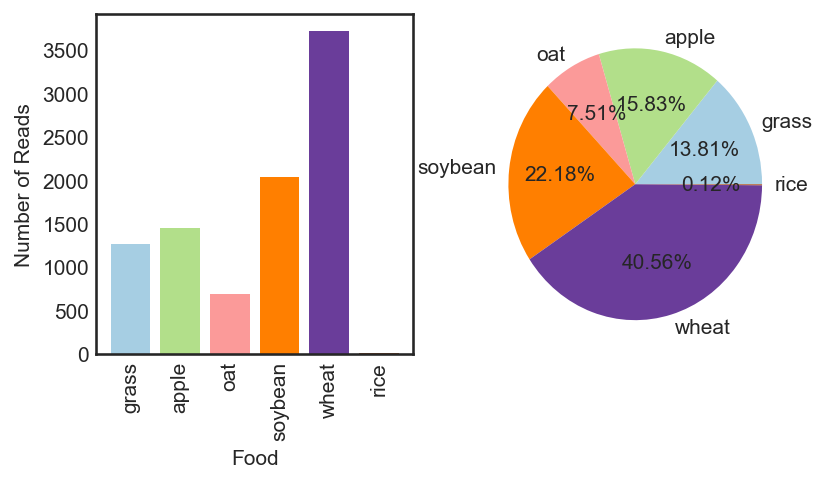

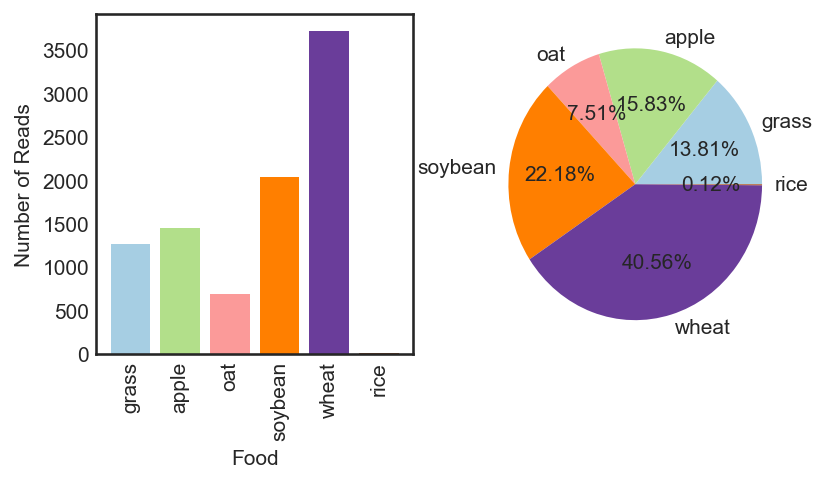

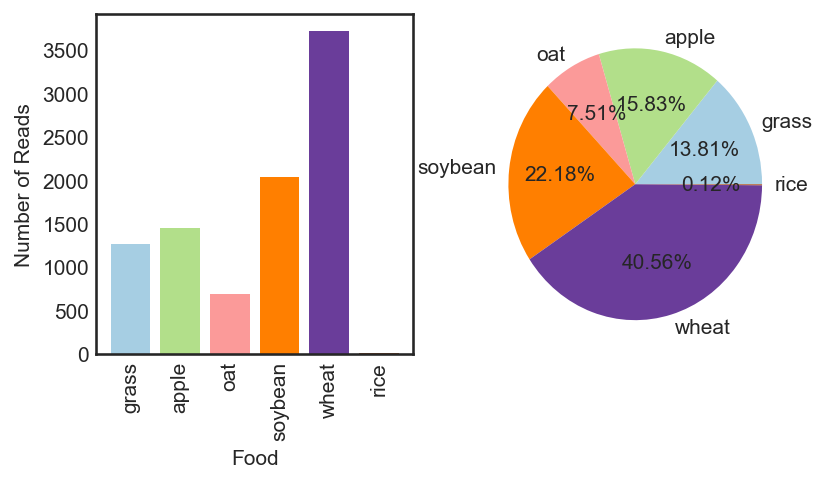

In [11]:
importlib.reload(functions)
button = widgets.Button(description="Show Graph",
                        layout=widgets.Layout(width='300px',
                                             height='50px'))


def onbuttonclick(b):
    r = functions.plotFood(dataset_id.value, diet.value)
button.on_click(onbuttonclick)
b = display(button)

From this chart, you should get a pretty good idea what your animal species has been eating!